In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=14) 

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('trashscience/data.csv', header=0, index_col='Histnum')
data.head()

,Days,Age,Death,O2,Reanim,Ventilator,Hypert,CHF,Diabetes,CKD,Onco,COPD,AF,Sex
Histnum,,,,,,,,,,,,,,
16532,8,84,0,1,0,0,0,1,0,0,0,0,1,1
15602,7,71,0,0,0,0,0,0,0,0,0,0,0,1
15606,8,60,0,0,0,0,0,0,0,0,0,0,0,0
15607,8,45,0,0,0,0,0,0,0,0,0,0,0,0
15609,18,26,0,0,0,0,0,0,0,0,0,0,0,1


In [3]:
data.shape[0]

599

In [4]:
data.groupby("Death").Sex.value_counts(normalize=False)

Death  Sex
0      1      305
       0      227
1      1       41
       0       26
Name: Sex, dtype: int64

In [5]:
data[(data["Age"] <= 75) & (data["Sex"] == 0) & (data["Death"] == 1)].shape

(12, 14)

**Количество наблюдений**: 599

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 16532 to 16308
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Days        599 non-null    int64
 1   Age         599 non-null    int64
 2   Death       599 non-null    int64
 3   O2          599 non-null    int64
 4   Reanim      599 non-null    int64
 5   Ventilator  599 non-null    int64
 6   Hypert      599 non-null    int64
 7   CHF         599 non-null    int64
 8   Diabetes    599 non-null    int64
 9   CKD         599 non-null    int64
 10  Onco        599 non-null    int64
 11  COPD        599 non-null    int64
 12  AF          599 non-null    int64
 13  Sex         599 non-null    int64
dtypes: int64(14)
memory usage: 70.2 KB


## Описание признаков  
### Анализируемые переменные  
**Age** (непрерывная) - возраст пациента на день госпитализации  
**Sex** (номинальная, бинарная) - пол: мужской (0) и женский (1)  
**Hypert** (номинальная, бинарная) - артериальная гипертензия (1) по данным эпикриза  
**CHF** (номинальная, бинарная) - клинически явная хроническая сердечная недостаточность (Н2А и более) по данным эпикриза  
**Diabetes** (номинальная, бинарная) - сахарный диабет (СД) по лабораторным данным (глюкоза натощак) и данным эпикриза  
**CKD** (номинальная, бинарная) - ХБП с СКФ менее 35 мл/мин/1,73м2 (С3B и более) по лабораторным данным  
**Onco** (номинальная, бинарная) - активное (не в ремисии) онкологическое заболевание по данным эпикриза  
**COPD** (номинальная, бинарная) - хроническая обструктивная болезнь легких (ХОБЛ) по данным эпикриза  
**AF** (номинальная, бинарная) - любая форма фибрилляции предсердий (ФП) с зарегистрированной на ЭКГ ФП в период госпитализации  
### Целевые переменные (исходы)
**Death** (номинальная, бинарная) - выписан живым (0), умер в стационаре (1)  
**O2** (номинальная, бинарная) - нуждаемость в кислороде (1)  
**Reanim** (номинальная, бинарная) - пребывание в реанимации (1)  
**Ventilator** (номинальная, бинарная) - нуждаемость в вентиляции легких (в том числе неинвазивной)  
**Days** (непрерывная) - количество дней пребывания в стационаре

In [7]:
col_continous = ["Age", "Days"]
col_nominal = ["Hypert", "CHF", "Diabetes", "CKD", "Onco", "COPD"]
col_nominal_af = ["AF", "Hypert", "CHF", "Diabetes", "CKD", "Onco", "COPD"]
col_outcome = ["O2", "Reanim", "Ventilator", "Death"]

## Анализируемые переменные
### Непрерывные

In [8]:
data[col_continous].describe()

,Age,Days
count,599.000000,599.000000
mean,64.207012,10.727880
std,14.707763,7.121807
min,18.000000,1.000000
25%,57.000000,7.000000
50%,66.000000,9.000000
75%,73.000000,12.500000
max,96.000000,61.000000


In [9]:
data["Sex"].value_counts()

1    346
0    253
Name: Sex, dtype: int64

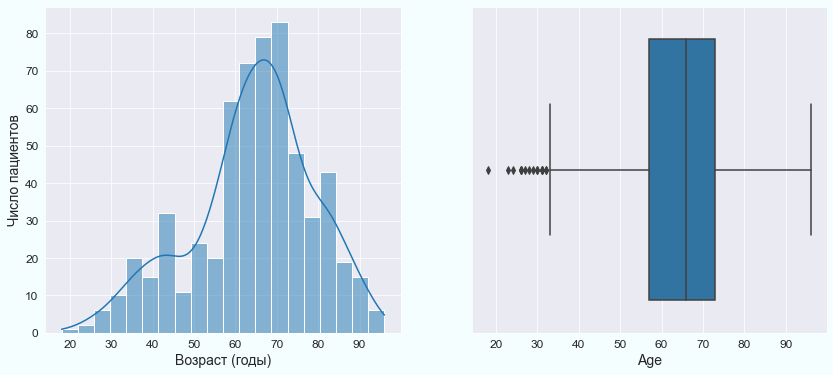

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14,6), facecolor="#F4FEFF");
sns.histplot(data=data, x='Age', kde=True, bins=20, ax=ax[0]);
ax[0].set_xlabel("Возраст (годы)")
ax[0].set_ylabel("Число пациентов")
sns.boxplot(data=data, x='Age', ax=ax[1]);

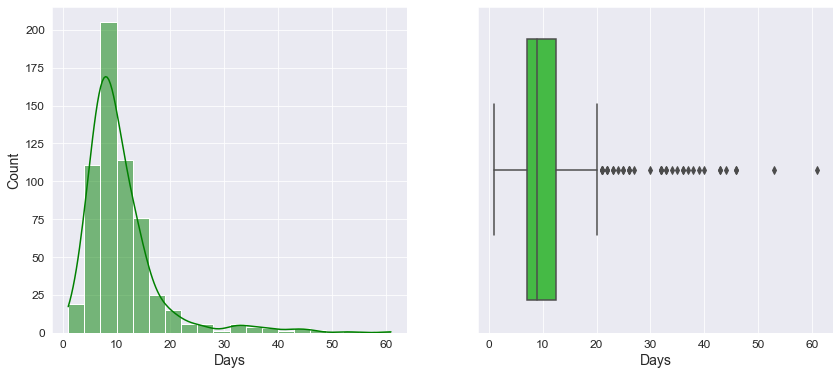

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(14,6));
sns.histplot(data=data, x='Days', kde=True, bins=20, ax=ax[0], color="green");
sns.boxplot(data=data, x='Days', ax=ax[1], color="limegreen");

### Номинальные

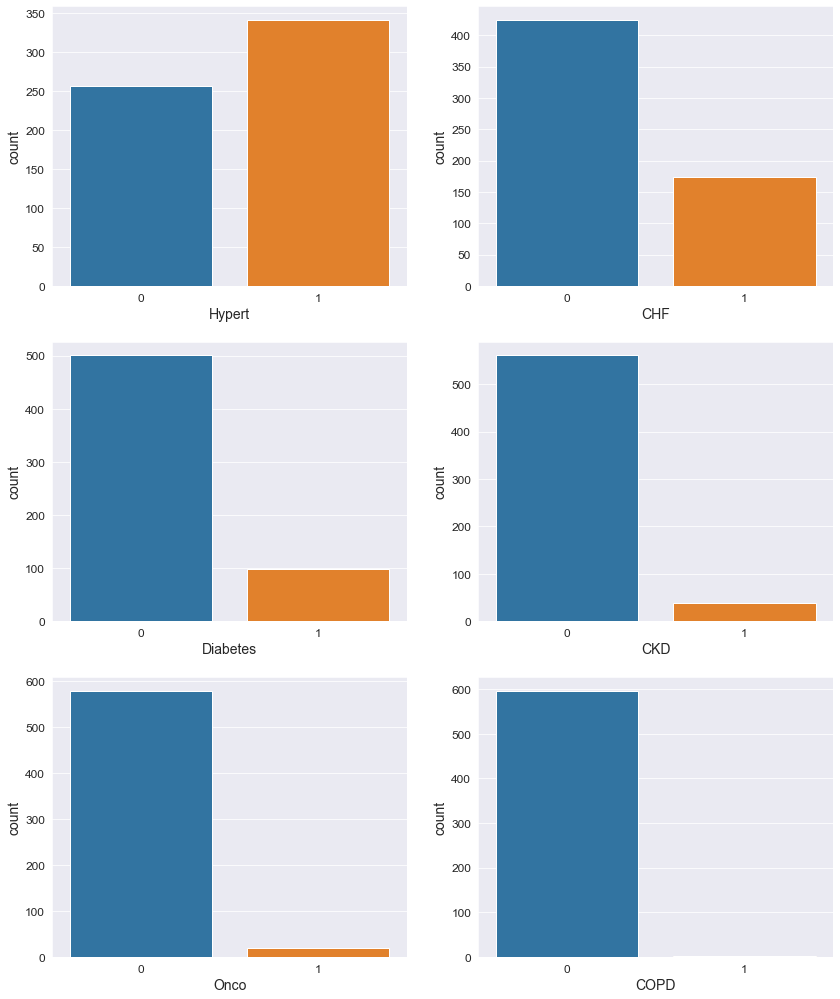

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12));
for i, col in enumerate(col_nominal):
    sns.countplot(data=data, x=col, ax=ax[i // 2, i % 2]);
plt.subplots_adjust(top=1.15, bottom=0.05)

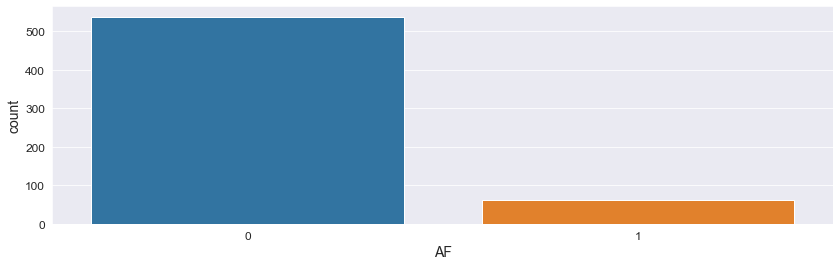

In [13]:
plt.figure(figsize=(14, 4))
sns.countplot(data=data, x="AF");

In [14]:
df1 = pd.DataFrame()
for name, col in zip(["Фибрилляция предсердий", "Артериальная гипертензия", "ХСН", "Сахарный диабет", "ХБП", "Онкология"], col_nominal_af[:-1]):
    df1[name] = data[col].value_counts().round(0).map('{:,.0f}'.format)
    df1[name + " (%)"] = (data[col].value_counts(normalize=True)*100).round(1).map('{}%'.format)
df1 = df1.transpose()
df1



,0,1
Фибрилляция предсердий,538,61
Фибрилляция предсердий (%),89.8%,10.2%
Артериальная гипертензия,257,342
Артериальная гипертензия (%),42.9%,57.1%
ХСН,425,174
ХСН (%),71.0%,29.0%
Сахарный диабет,501,98
Сахарный диабет (%),83.6%,16.4%
ХБП,561,38
ХБП (%),93.7%,6.3%


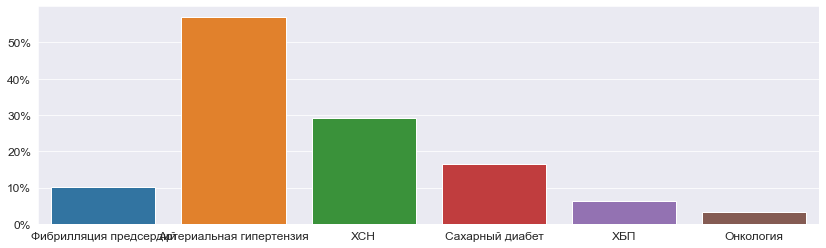

In [15]:
import matplotlib.ticker as mtick
plt.figure(figsize=(14, 4))
ax = sns.barplot(x=df1.iloc[::2, 1].index, y=df1.iloc[::2, 1].astype(int)/(df1.iloc[::2, 0].astype(int)+df1.iloc[::2, 1].astype(int)));
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

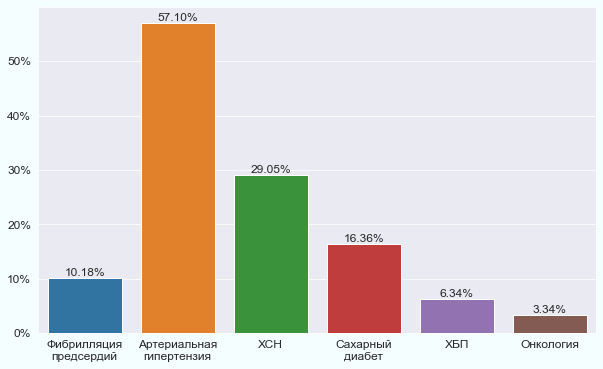

In [16]:
import textwrap
plt.figure(figsize=(10, 6), facecolor="#F4FEFF")
ax = sns.barplot(x=df1.iloc[::2, 1].index, y=df1.iloc[::2, 1].astype(int)/(df1.iloc[::2, 0].astype(int)+df1.iloc[::2, 1].astype(int))*100);
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.yaxis.set_major_formatter(mtick.PercentFormatter(100))
ax.set_xticklabels(labels);
ax.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=12);

### Исходы

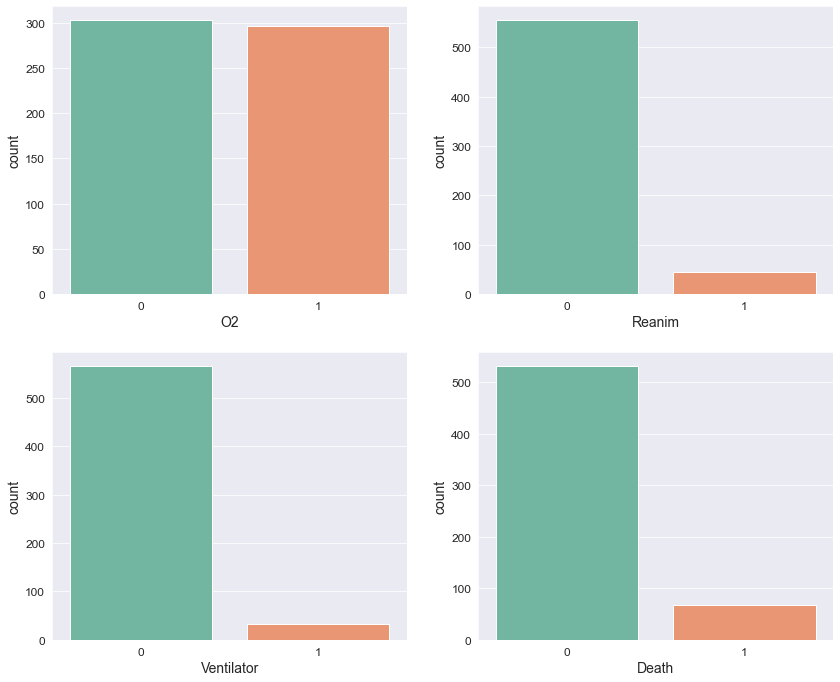

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8));
for i, col in enumerate(col_outcome):
    sns.countplot(data=data, x=col, ax=ax[i // 2, i % 2], palette="Set2");
plt.subplots_adjust(top=1.15, bottom=0.05)

In [18]:
df2 = pd.DataFrame()
for col in col_outcome:
    df2[col] = data[col].value_counts().round(0).map('{:,.0f}'.format)
    df2[col + " (%)"] = (data[col].value_counts(normalize=True)*100).round(1).map('{}%'.format)
df2 = df2.transpose()
df2

,0,1
O2,303,296
O2 (%),50.6%,49.4%
Reanim,555,44
Reanim (%),92.7%,7.3%
Ventilator,567,32
Ventilator (%),94.7%,5.3%
Death,532,67
Death (%),88.8%,11.2%


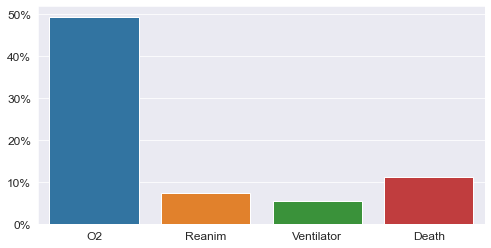

In [19]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=df2.iloc[::2, 1].index, y=df2.iloc[::2, 1].astype(int)/(df2.iloc[::2, 0].astype(int)+df2.iloc[::2, 1].astype(int)));
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

## Связь между анализируемыми признаками и исходами

### Возраст

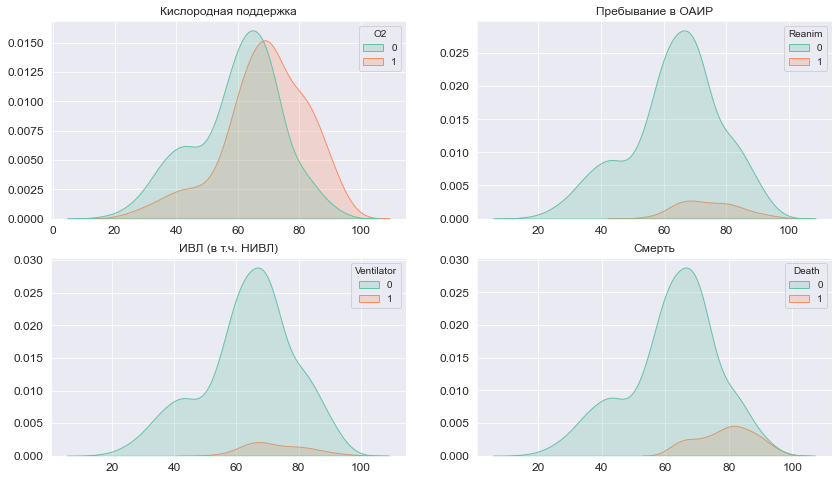

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(14, 8));
sns.kdeplot(x='Age', data=data, hue='O2', shade=True, palette="Set2", ax=ax[0, 0]).set_title("Кислородная поддержка");
sns.kdeplot(x='Age', data=data, hue='Reanim', shade=True, palette="Set2", ax=ax[0, 1]).set_title("Пребывание в ОАИР");
sns.kdeplot(x='Age', data=data, hue='Ventilator', shade=True, palette="Set2", ax=ax[1, 0]).set_title("ИВЛ (в т.ч. НИВЛ)");
sns.kdeplot(x='Age', data=data, hue='Death', shade=True, palette="Set2", ax=ax[1, 1]).set_title("Смерть");
for row, col in [(0, 0), (0, 1), (1, 0), (1, 1)]:
    ax[row, col].xaxis.label.set_visible(False);
    ax[row, col].yaxis.label.set_visible(False);
plt.show();

[None, None]

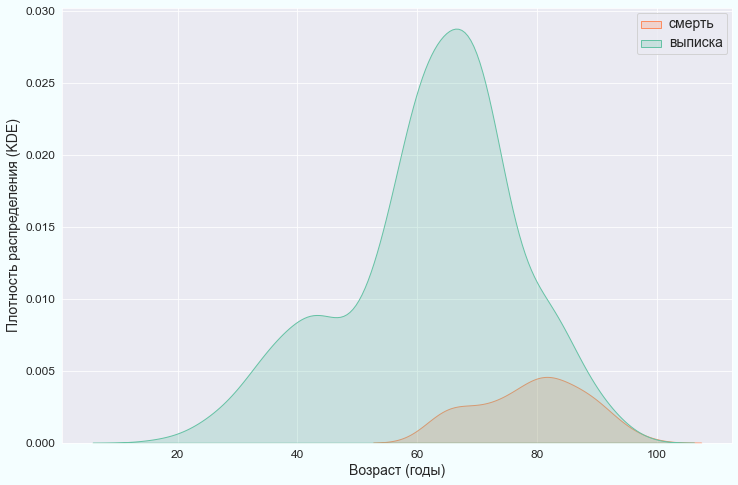

In [21]:
plt.figure(figsize=(12, 8), facecolor="#F4FEFF")
ax = sns.kdeplot(x='Age', data=data, hue='Death', shade=True, palette="Set2");
ax.set_xlabel("Возраст (годы)");
ax.set_ylabel("Плотность распределения (KDE)");
plt.legend(["смерть", "выписка"])
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title

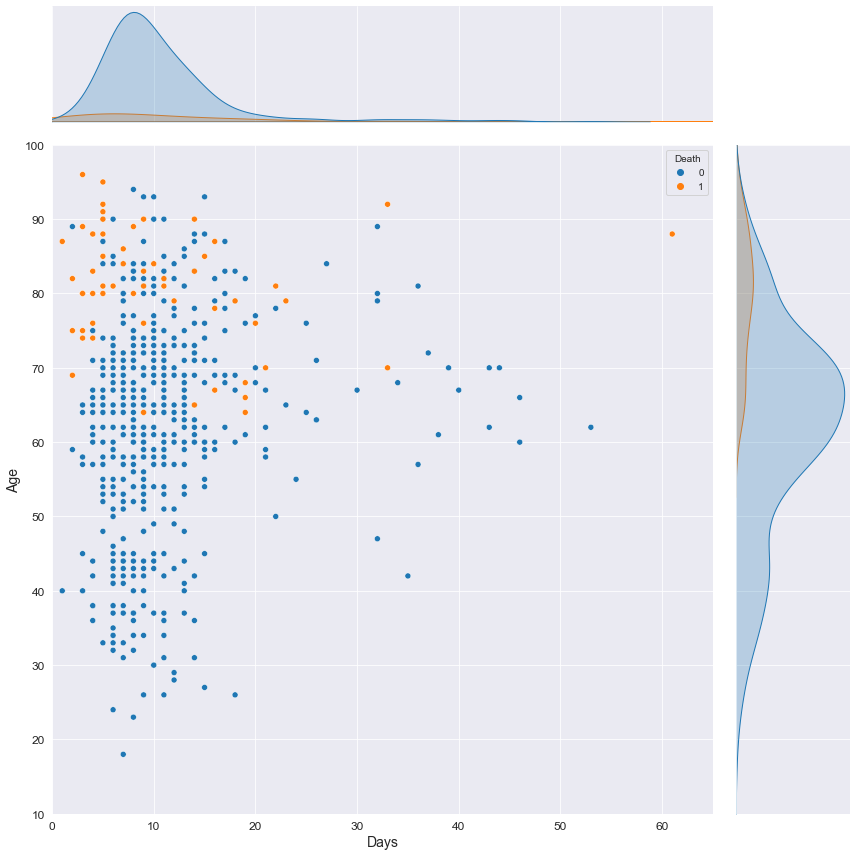

In [22]:
sns.jointplot(data=data, x="Days", y="Age", hue="Death", height=12, xlim=[0, 65], ylim=[10, 100]);

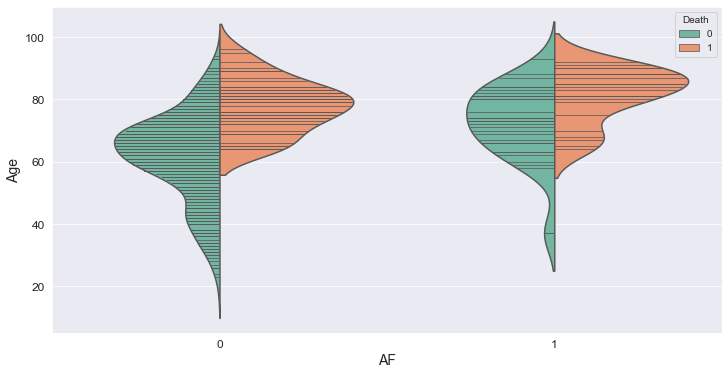

In [23]:
plt.figure(figsize=(12, 6));
sns.violinplot(x="AF", y="Age", hue="Death", data=data, palette="Set2", inner="stick", split=True);

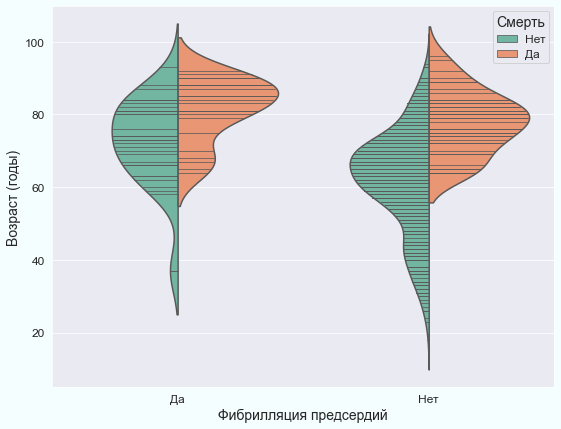

In [24]:
plt.figure(figsize=(9, 7), facecolor="#F4FEFF");
ax = sns.violinplot(x=data["AF"].map({0: "Нет", 1: "Да"}), y=data["Age"], hue=data["Death"].map({0: "Нет", 1: "Да"}), palette="Set2", inner="stick", split=True);
ax.set_xlabel("Фибрилляция предсердий");
ax.set_ylabel("Возраст (годы)");
plt.legend(title="Смерть");
plt.setp(ax.get_legend().get_texts(), fontsize='12'); # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14'); # for legend title

### Пол

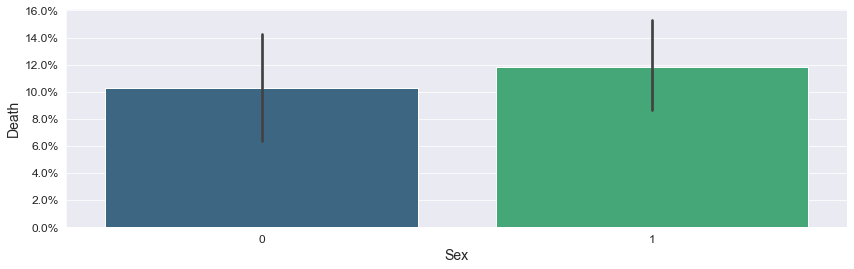

In [25]:
plt.figure(figsize=(14, 4))
ax = sns.barplot(data=data, x="Sex", y="Death", palette="viridis")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1));

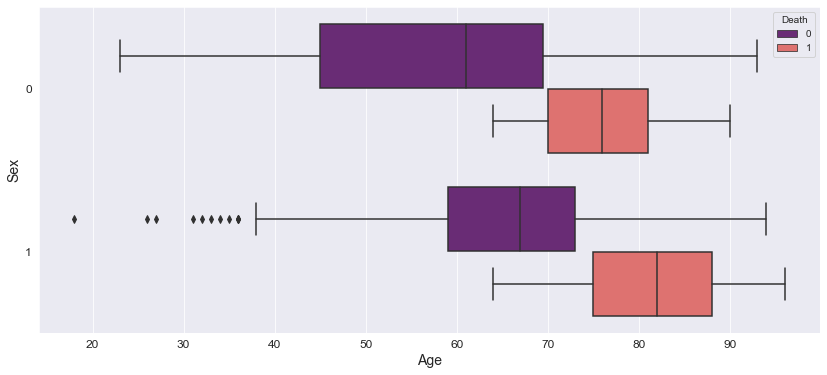

In [26]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Age", y="Sex", hue="Death", data=data, orient="h", palette="magma");

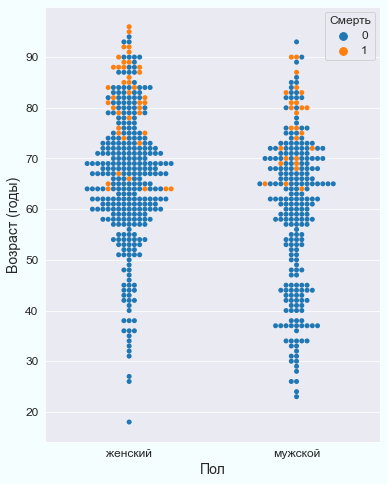

In [27]:
plt.figure(figsize=(6, 8), facecolor="#F4FEFF");
ax = sns.swarmplot(x=data.Sex.map({0: 'мужской', 1: 'женский'}), y=data["Age"], hue=data["Death"]);
ax.set_ylabel("Возраст (годы)");
ax.set_xlabel("Пол");
plt.legend(title="Смерть")
plt.setp(ax.get_legend().get_texts(), fontsize='12'); # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12'); # for legend title

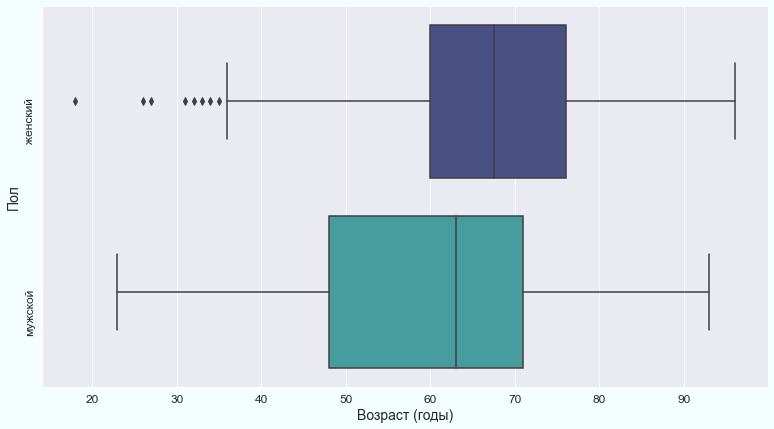

In [28]:
plt.figure(figsize=(13, 7), facecolor="#F4FEFF")
plt.yticks(rotation=90)
ax = sns.boxplot(x=data.Age, y=data.Sex.map({0: 'мужской', 1: 'женский'}), orient="h", palette="mako");
ax.set(xlabel='Возраст (годы)', ylabel='Пол');

### Коморбидность

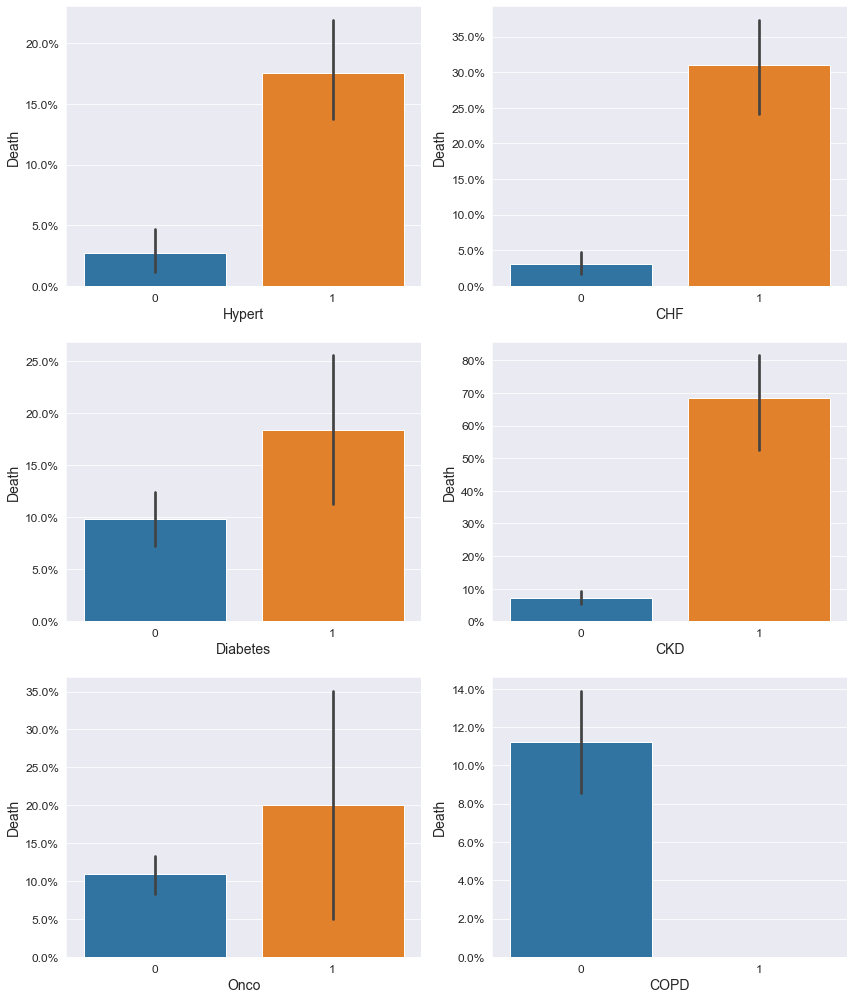

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(14, 12));
for i, col in enumerate(col_nominal):
    sns.barplot(data=data, x=col, y="Death", ax=ax[i // 2, i % 2]);
    ax[i // 2, i % 2].yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.subplots_adjust(top=1.15, bottom=0.05)

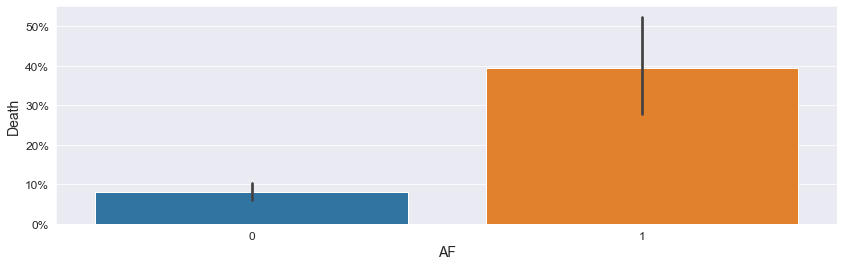

In [30]:
plt.figure(figsize=(14, 4))
ax = sns.barplot(data=data, x="AF", y="Death")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1));

In [31]:
df3 = pd.DataFrame()
for name, col in zip(["Фибрилляция предсердий", "Артериальная гипертензия", "ХСН", "Сахарный диабет", "ХБП", "Онкология"], col_nominal_af[:-1]):
    df3[name] = data.loc[data["Death"] == 1, col].value_counts().round(0).map('{:,.0f}'.format)
    df3[name + " (%)"] = (data.loc[data["Death"] == 1, col].value_counts(normalize=True)*100).round(1).map('{}%'.format)
df3 = df3.transpose()
df3

,0,1
Фибрилляция предсердий,43,24
Фибрилляция предсердий (%),64.2%,35.8%
Артериальная гипертензия,7,60
Артериальная гипертензия (%),10.4%,89.6%
ХСН,13,54
ХСН (%),19.4%,80.6%
Сахарный диабет,49,18
Сахарный диабет (%),73.1%,26.9%
ХБП,41,26
ХБП (%),61.2%,38.8%


In [32]:
df4 = pd.DataFrame()
for name, col in zip(["Фибрилляция предсердий", "Артериальная гипертензия", "ХСН", "Сахарный диабет", "ХБП", "Онкология"], col_nominal_af[:-1]):
    df4[name] = data.loc[data[col] == 1, "Death"].value_counts().round(0).map('{:,.0f}'.format)
    #df4[name + " (%)"] = (data.loc[data["Death"] == 1, col].value_counts(normalize=True)*100).round(1).map('{}%'.format)
df4 = df4.transpose()
df4

,0,1
Фибрилляция предсердий,37,24
Артериальная гипертензия,282,60
ХСН,120,54
Сахарный диабет,80,18
ХБП,12,26
Онкология,16,4


## Корреляционный анализ

In [33]:
data.drop(columns=["COPD", "Ventilator", "O2", "Reanim", "Days"], inplace=True)

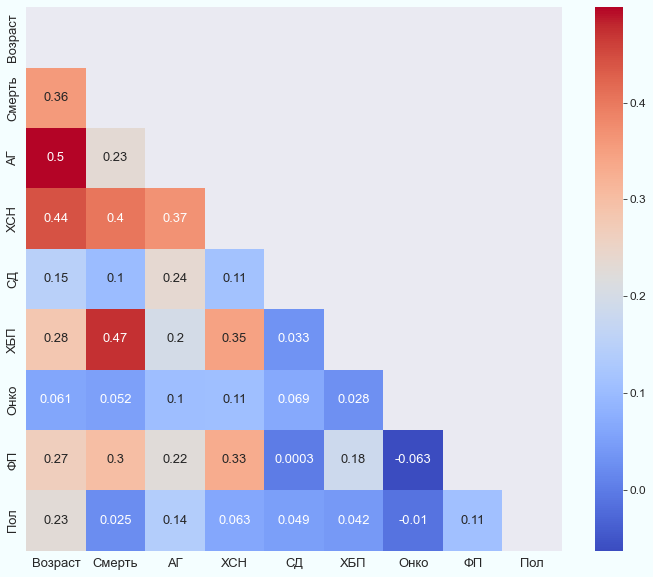

In [34]:
corr= data.corr()
matrix = np.triu(corr)
plt.figure(figsize=(12, 10), facecolor="#F4FEFF")
ax = sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm', annot_kws={"size":13});
ax.set_yticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);
ax.set_xticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);

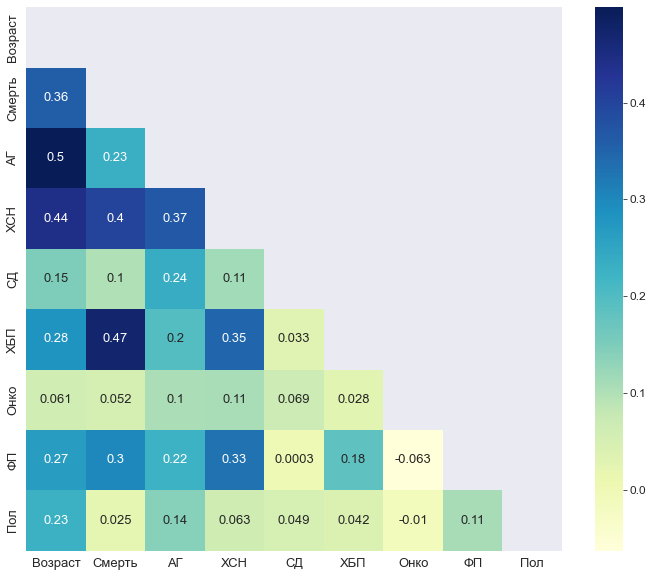

In [35]:
corr= data.corr()
matrix = np.triu(corr)
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, mask=matrix, cmap="YlGnBu", annot_kws={"size":13});
ax.set_yticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);
ax.set_xticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);

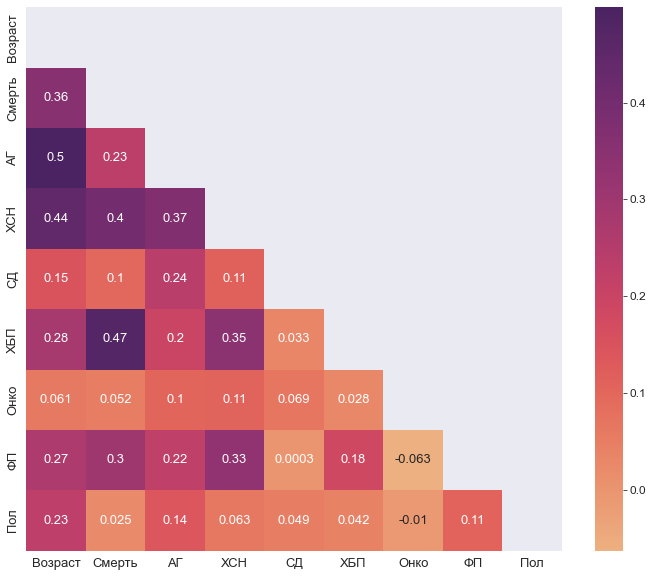

In [36]:
corr= data.corr()
matrix = np.triu(corr)
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, mask=matrix, cmap="flare", annot_kws={"size":13});
ax.set_yticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);
ax.set_xticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);

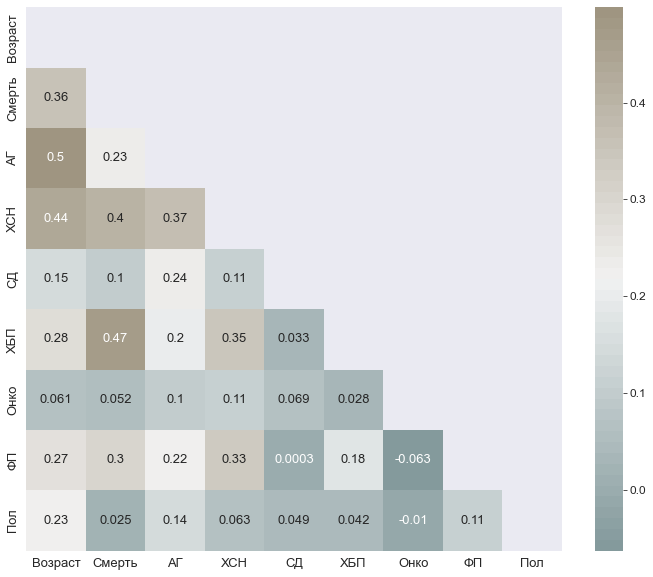

In [37]:
palette = sns.diverging_palette(200.9, 67.0, s=25, l=62, n=50)
corr= data.corr()
matrix = np.triu(corr)
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, mask=matrix, cmap=palette, annot_kws={"size":13});
ax.set_yticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);
ax.set_xticklabels(["Возраст", "Смерть", "АГ", "ХСН", "СД", "ХБП", "Онко", "ФП", "Пол"], fontsize=13);

## Логистическая регрессия

In [38]:
col_independent = ["Age", "Sex", "AF", "Hypert", "CHF", "Diabetes", "CKD", "Onco"]
col_dependent = ["O2", "Reanim", "Ventilator", "Death"]

In [39]:
def scale(X):
    print(np.mean(X, axis=0), np.std(X))
    return (X - np.mean(X, axis=0))/np.std(X)


In [40]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, brier_score_loss)
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import itertools

In [41]:
def create_model(columns, regularize=True, report=True, random_state=7):
    X = data.loc[:, columns]
    X = scale(X)
    X = sm.add_constant(X)
    y = data.loc[:, col_dependent[3]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

    
    model = sm.Logit(y_train, X_train)
    if not regularize:
        result = model.fit(method='newton')
    else:
        result = model.fit_regularized()
    
    yhat = result.predict(X_test)
    prediction = list(map(round, yhat))
    cm = confusion_matrix(y_test, prediction)
    cmatr = pd.DataFrame(cm)
    display(cmatr)
    tn, fp, fn, tp = cm.ravel()
    print(f"Negative predictive value = {tn/(tn+fn)}")
    print(f"Positive predictive value = {tp/(tp+fp)}")
    
    print(f"Sensitivity (recall, true positive rate) = {tp/(tp+fn)}")
    print(f"Specifity (true negative rate) = {tn/(tn+fp)}")
    
    print('Test accuracy = ', accuracy_score(y_test, prediction))
    
    params = result.params
    conf = result.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['5%', '95%', 'Odds Ratio']

    fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
    auc = metrics.roc_auc_score(y_test, yhat)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    if report:
        return result
    else:
        return None

In [46]:
def print_roc_for_combinations(columns, regularize=True):
    y = data.loc[:, col_dependent[3]]
    plt.figure(figsize=(10, 10), facecolor="#F4FEFF")
    for combination in itertools.combinations(columns, len(columns)-1):
        X = data.loc[:, combination]
        X = scale(X)
        X = sm.add_constant(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

        model = sm.Logit(y_train, X_train)
        if not regularize:
            result = model.fit(method='newton')
        else:
            result = model.fit_regularized()

        yhat = result.predict(X_test)
        
        prediction = list(map(round, yhat))
        cm = confusion_matrix(y_test, prediction)
        tn, fp, fn, tp = cm.ravel()
        NPV =tn/(tn+fn)
        fpr, tpr, _ = metrics.roc_curve(y_test,  yhat)
        auc = metrics.roc_auc_score(y_test, yhat)
        plt.plot(fpr,tpr,label=f"Исключен: {set(combination) ^ set(columns)}, auc="+str(round(auc, 3))+", NPV="+str(round(NPV, 3)))
        plt.legend(fontsize=16)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
    plt.show()

Age         64.207012
Sex          0.577629
AF           0.101836
Hypert       0.570952
CHF          0.290484
Diabetes     0.163606
CKD          0.063439
Onco         0.033389
dtype: float64 Age         14.695480
Sex          0.493937
AF           0.302433
Hypert       0.494940
CHF          0.453986
Diabetes     0.369918
CKD          0.243751
Onco         0.179650
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2377278776480003
            Iterations: 44
            Function evaluations: 44
            Gradient evaluations: 44


,0,1
0,135,4
1,3,8


Negative predictive value = 0.9782608695652174
Positive predictive value = 0.6666666666666666
Sensitivity (recall, true positive rate) = 0.7272727272727273
Specifity (true negative rate) = 0.9712230215827338
Test accuracy =  0.9533333333333334


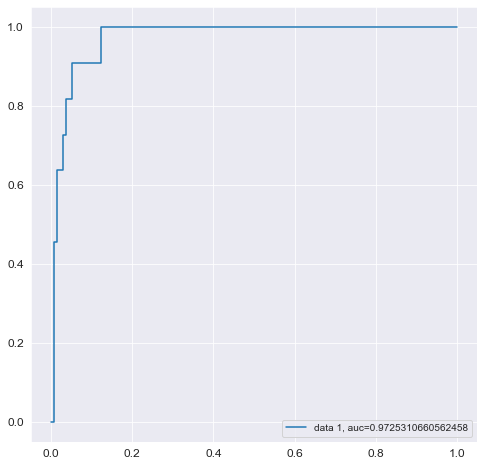

In [47]:
create_model(col_independent)

Age         64.207012
Sex          0.577629
AF           0.101836
Hypert       0.570952
CHF          0.290484
Diabetes     0.163606
dtype: float64 Age         14.695480
Sex          0.493937
AF           0.302433
Hypert       0.494940
CHF          0.453986
Diabetes     0.369918
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.25082761443407053
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Age       64.207012
Sex        0.577629
AF         0.101836
Hypert     0.570952
CHF        0.290484
CKD        0.063439
dtype: float64 Age       14.695480
Sex        0.493937
AF         0.302433
Hypert     0.494940
CHF        0.453986
CKD        0.243751
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24064154167678276
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
Age         64

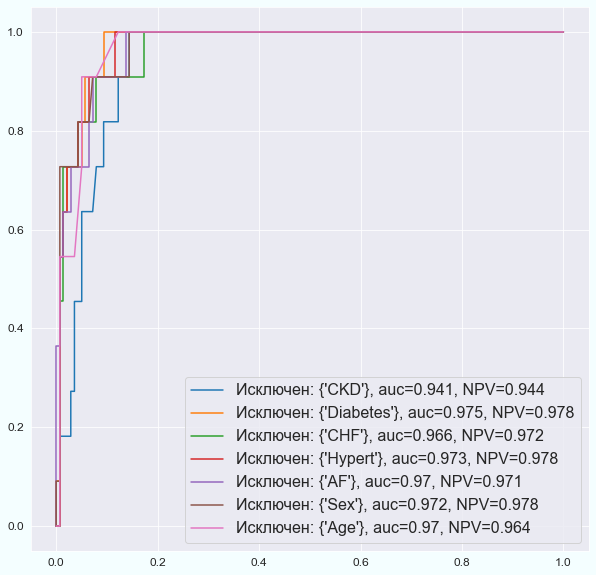

In [48]:
print_roc_for_combinations(["Age", "Sex", "AF", "Hypert", "CHF", "Diabetes", "CKD"], regularize=True)

Age    64.207012
AF      0.101836
CHF     0.290484
dtype: float64 Age    14.695480
AF      0.302433
CHF     0.453986
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.261953524885484
            Iterations: 23
            Function evaluations: 23
            Gradient evaluations: 23
Age    64.207012
AF      0.101836
CKD     0.063439
dtype: float64 Age    14.695480
AF      0.302433
CKD     0.243751
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2577255834235001
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22
Age    64.207012
CHF     0.290484
CKD     0.063439
dtype: float64 Age    14.695480
CHF     0.453986
CKD     0.243751
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2535740430792856
            Iterations: 22
            Function evaluations: 23
            

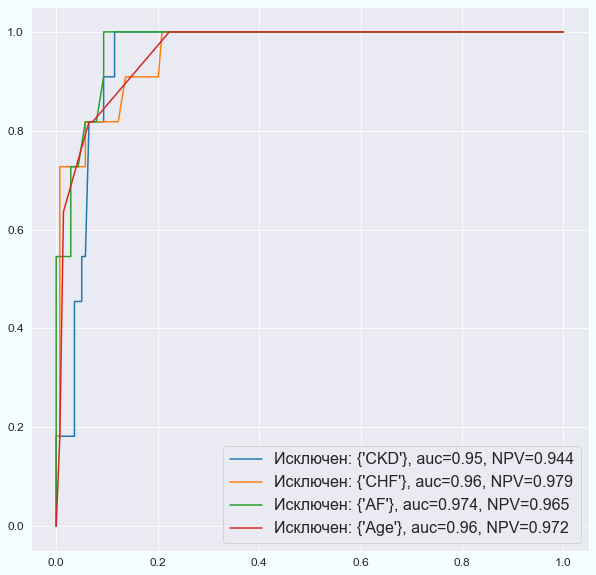

In [49]:
print_roc_for_combinations(["Age", "AF", "CHF", "CKD"], regularize=True)

Age    64.207012
AF      0.101836
dtype: float64 Age    14.695480
AF      0.302433
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2810232634991849
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
Age    64.207012
CKD     0.063439
dtype: float64 Age    14.695480
CKD     0.243751
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2684356853362733
            Iterations: 19
            Function evaluations: 19
            Gradient evaluations: 19
AF     0.101836
CKD    0.063439
dtype: float64 AF     0.302433
CKD    0.243751
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.29293960639380934
            Iterations: 16
            Function evaluations: 16
            Gradient evaluations: 16


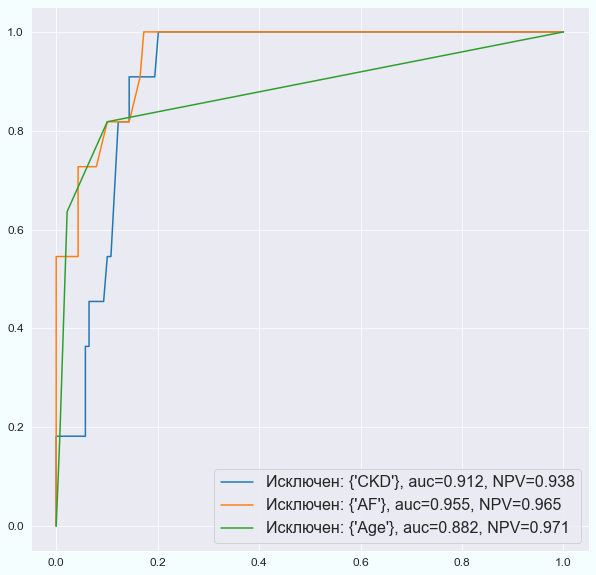

In [50]:
print_roc_for_combinations(["Age", "AF", "CKD"], regularize=True)

Age    64.207012
AF      0.101836
CKD     0.063439
dtype: float64 Age    14.695480
AF      0.302433
CKD     0.243751
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2577255834235001
            Iterations: 22
            Function evaluations: 22
            Gradient evaluations: 22


,0,1
0,137,2
1,3,8


Negative predictive value = 0.9785714285714285
Positive predictive value = 0.8
Sensitivity (recall, true positive rate) = 0.7272727272727273
Specifity (true negative rate) = 0.9856115107913669
Test accuracy =  0.9666666666666667


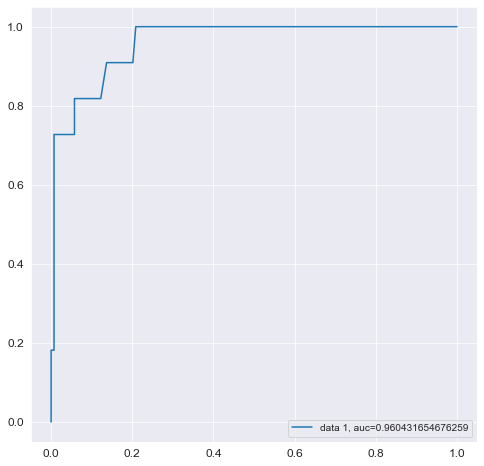

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Death   No. Observations:                  449
Model:                          Logit   Df Residuals:                      445
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Apr 2022   Pseudo R-squ.:                  0.3150
Time:                        04:12:44   Log-Likelihood:                -115.72
converged:                       True   LL-Null:                       -168.93
Covariance Type:            nonrobust   LLR p-value:                 6.482e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7904      0.255    -10.927      0.000      -3.291      -2.290
Age            1.2561      0.250      5.034      0.000       0.767       1.745
AF             0.4007      0.126      3.175      0.001       0.153       0.648
CKD            0.5306      0.119      4.467      0.000       0.298       0.763
==============================================================================
"""

In [51]:
create_model(["Age", "AF", "CKD"]).summary()

Age    64.207012
AF      0.101836
CHF     0.290484
CKD     0.063439
dtype: float64 Age    14.695480
AF      0.302433
CHF     0.453986
CKD     0.243751
dtype: float64
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.24725948240045276
            Iterations: 27
            Function evaluations: 27
            Gradient evaluations: 27


,0,1
0,135,4
1,3,8


Negative predictive value = 0.9782608695652174
Positive predictive value = 0.6666666666666666
Sensitivity (recall, true positive rate) = 0.7272727272727273
Specifity (true negative rate) = 0.9712230215827338
Test accuracy =  0.9533333333333334


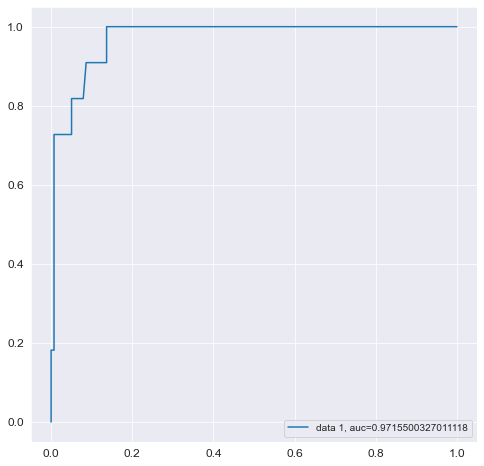

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Death   No. Observations:                  449
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                            4
Date:                Thu, 14 Apr 2022   Pseudo R-squ.:                  0.3428
Time:                        04:12:44   Log-Likelihood:                -111.02
converged:                       True   LL-Null:                       -168.93
Covariance Type:            nonrobust   LLR p-value:                 4.183e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9003      0.271    -10.696      0.000      -3.432      -2.369
Age            1.0687      0.261      4.096      0.000       0.557       1.580
AF             0.3160      0.131      2.419      0.016       0.060       0.572
CHF            0.5404      0.178      3.032      0.002       0.191       0.890
CKD            0.4320      0.122      3.537      0.000       0.193       0.671
==============================================================================
"""

In [52]:
create_model(["Age", "AF", "CHF", "CKD"]).summary()